In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.color_palette('Set2')
dlsu_green = "#117a65ff"

from sklearn import datasets
from sklearn.model_selection import train_test_split
from numpy.testing import assert_almost_equal
from sklearn.metrics import r2_score

## KNN Using Sklearn

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

## Load wine dataset

In [ ]:
Always remember to drop the target kasi lagi nadadali

In [6]:
wine_df = pd.read_csv("data/winequality-red.csv")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## Exploratory Analysis

## Distribution of Wine Quality

C:\Users\nino_\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'value count')

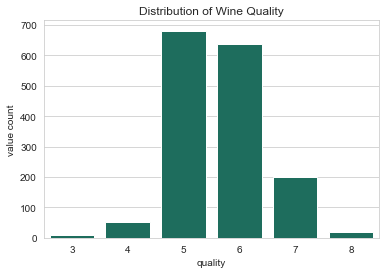

In [9]:
ax = sns.countplot(wine_df['quality'], color=dlsu_green)
ax.set_title('Distribution of Wine Quality')
ax.set_ylabel('value count')

C:\Users\nino_\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

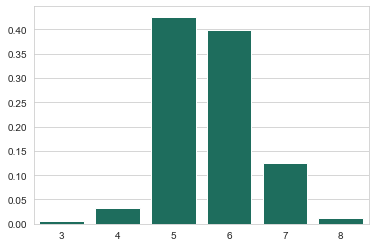

In [10]:
res = wine_df['quality'].value_counts(normalize=True)
sns.barplot(res.index, res.values, color=dlsu_green)

## Correlation of Features

<AxesSubplot:>

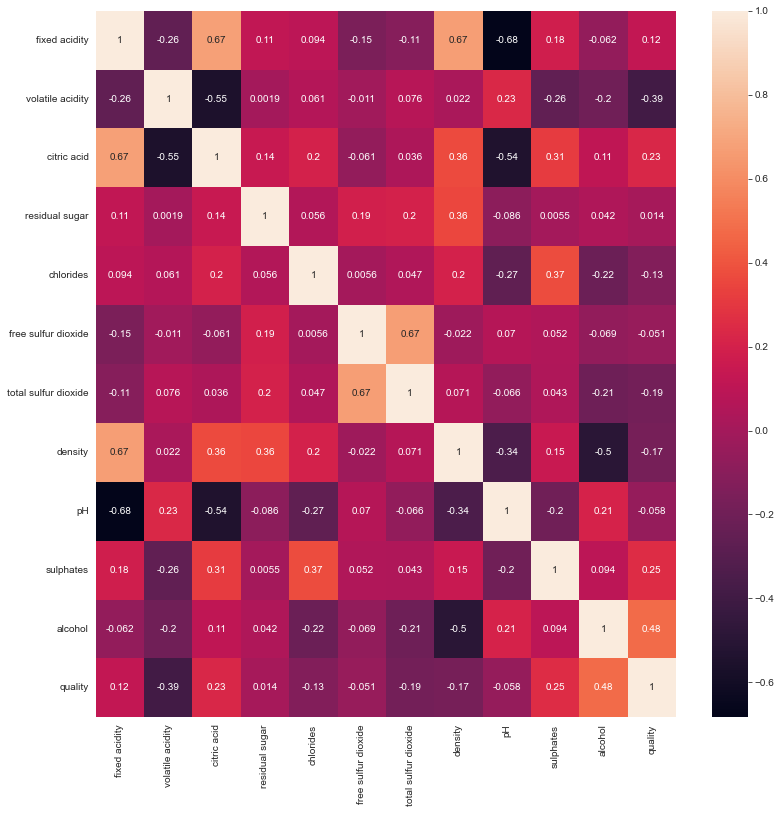

In [11]:
corr = wine_df.corr()
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(corr, ax=ax, annot=True)

## Re-frame our problem, from regression to classification

In [12]:
wine_df['quality_classif'] = wine_df['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Build Model

## Train-Test Split Data

In [13]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_classif
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


## Create an Initial Model & Check for Accuracy

In [14]:
from sklearn.neighbors import KNeighborsClassifier

## Optimize Model 

Play around with different k values and store the k setting, p setting, train and test accuracy in a dataframe

In [18]:
es = []
for k in range(1, 15):
    for p in [1, 2]:
        clf = KNeighborsClassifier(n_neighbors=k, p=p)
        clf.fit(X_train, y_train)
        
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        res.append([k, p, train_score, test_score])
        
res_df = pd.DataFrame(res, columns=['k', 'p', 'train_score', 'test_score'])
res_df


NameError: name 'X_train' is not defined

## Plot test and train accuracy, compare the results

In [ ]:
ax = sns.lineplot(res_df.k, res_df.train_score, label="train_score")
sns.lineplot(res_df.k, res_df.test_score, label="test_score")


## Regression

We'll be using another dataset for the regression task since we need continuous values as labels / outputs / targets. One readily-available dataset for this is the **Boston dataset**. It contains the house pricing data in Boston as well as the following features:

 - CRIM per capita crime rate by town
 - ZN proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS proportion of non-retail business acres per town
 - CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX nitric oxides concentration (parts per 10 million)
 - RM average number of rooms per dwelling
 - AGE proportion of owner-occupied units built prior to 1940
 - DIS weighted distances to five Boston employment centres
 - RAD index of accessibility to radial highways
 - TAX full-value property-tax rate per \$10,000
 - PTRATIO pupil-teacher ratio by town
 - B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT % lower status of the population
 - MEDV Median value of owner-occupied homes in $1000’s

For more info, please see <a href="https://scikit-learn.org/stable/datasets/index.html#boston-dataset">this link</a>.

And, as usual, we will also be splitting the dataset into train and test sets.

### Train-Test Split

In [43]:
X, y = datasets.load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\Users\nino_\anaconda3\envs\datascience\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

In [44]:
train_set = np.concatenate((X_train, y_train.reshape(-1, 1)), axis=1)
columns = datasets.load_boston()['feature_names'].tolist() + ['target']
df_train = pd.DataFrame(train_set, columns=columns)

test_set = np.concatenate((X_test, y_test.reshape(-1, 1)), axis=1)
df_test = pd.DataFrame(test_set, columns=columns)

display(df_train)
display(df_test)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.12802,0.0,8.56,0.0,0.520,6.474,97.1,2.4329,5.0,384.0,20.9,395.24,12.27,19.8
1,0.80271,0.0,8.14,0.0,0.538,5.456,36.6,3.7965,4.0,307.0,21.0,288.99,11.69,20.2
2,0.06888,0.0,2.46,0.0,0.488,6.144,62.2,2.5979,3.0,193.0,17.8,396.90,9.45,36.2
3,0.07503,33.0,2.18,0.0,0.472,7.420,71.9,3.0992,7.0,222.0,18.4,396.90,6.47,33.4
4,0.77299,0.0,8.14,0.0,0.538,6.495,94.4,4.4547,4.0,307.0,21.0,387.94,12.80,18.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.05360,21.0,5.64,0.0,0.439,6.511,21.1,6.8147,4.0,243.0,16.8,396.90,5.28,25.0
400,5.73116,0.0,18.10,0.0,0.532,7.061,77.0,3.4106,24.0,666.0,20.2,395.28,7.01,25.0
401,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34,13.5
402,0.05660,0.0,3.41,0.0,0.489,7.007,86.3,3.4217,2.0,270.0,17.8,396.90,5.50,23.6


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.14052,0.0,10.59,0.0,0.489,6.375,32.3,3.9454,4.0,277.0,18.6,385.81,9.38,28.1
1,12.04820,0.0,18.10,0.0,0.614,5.648,87.6,1.9512,24.0,666.0,20.2,291.55,14.10,20.8
2,0.76162,20.0,3.97,0.0,0.647,5.560,62.8,1.9865,5.0,264.0,13.0,392.40,10.45,22.8
3,3.69695,0.0,18.10,0.0,0.718,4.963,91.4,1.7523,24.0,666.0,20.2,316.03,14.00,21.9
4,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.10290,30.0,4.93,0.0,0.428,6.358,52.9,7.0355,6.0,300.0,16.6,372.75,11.22,22.2
98,2.14918,0.0,19.58,0.0,0.871,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79,19.4
99,0.14932,25.0,5.13,0.0,0.453,5.741,66.2,7.2254,8.0,284.0,19.7,395.11,13.15,18.7
100,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,16.1


### Prepare Data for Modeling

## Modeling

In [36]:
from sklearn.neighbors import KNeighborsRegressor

### Create the function to calculate the R-squared

For reference, here's the formula for R-squared:

$$R^{2} (y,\hat{y}) = 1- \dfrac{\Sigma_i (y_i - \hat{y}_i)^2}{\Sigma_i (y_i - \bar{y})^2}$$

In [32]:
def r_squared(y_true:np.array, y_pred:np.array) -> float:
    '''
    Returns the score using R-squared metric.
    '''
    y_mean = np.mean(y_true)
    ss_error_mean = ((y_true - y_mean)**2).sum()
    ss_error_reg = ((y_true - y_pred)**2).sum()
    
    return 1 - (ss_error_reg/ss_error_mean)

r_squared(np.array([14,18,17,20,21,26,28]), np.array([14,19,16,20,22,25,26]))

0.9458413926499033

In [34]:
assert_almost_equal(0.9458413926499033, r_squared(np.array([14,18,17,20,21,26,28]),  
                                                  np.array([14,19,16,20,22,25,26])))

### Create initial model where k=3

In [38]:
reg = KNeighborsRegressor(n_neighbors=3, p=2)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [41]:
y_pred = reg.predict(X_test)
r_squared(y_test, y_pred)

0.5573468687736531

## Optimize Model by Testing out Different K Values

In [47]:
res = []
for k in range(1, 15):
    for p in [1, 2]:
        clf = KNeighborsRegressor(n_neighbors=k, p=p)
        clf.fit(X_train, y_train)
        
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        res.append([k, p, train_score, test_score])
        
res_df = pd.DataFrame(res, columns=['k', 'p', 'train_score', 'test_score'])
res_df

,k,p,train_score,test_score
0,1,1,1.000000,0.564440
1,1,2,1.000000,0.296397
2,2,1,0.861481,0.467766
3,2,2,0.853743,0.452394
4,3,1,0.781289,0.560115
5,3,2,0.770001,0.568626
6,4,1,0.760673,0.514330
7,4,2,0.736800,0.554136
8,5,1,0.739798,0.534995
9,5,2,0.694631,0.505089


Play around with different k values and store the k setting, p setting, train and test accuracy in a dataframe

C:\Users\nino_\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nino_\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='k', ylabel='train_score'>

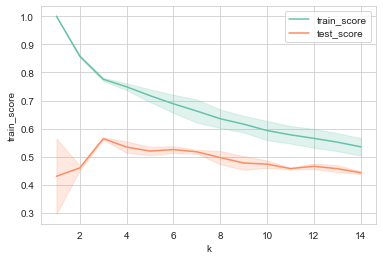

In [48]:
ax = sns.lineplot(res_df.k, res_df.train_score, label="train_score")
sns.lineplot(res_df.k, res_df.test_score, label="test_score")


In [49]:
res_df.iloc[res_df['test_score'].argmax()]

k              3.000000
p              2.000000
train_score    0.770001
test_score     0.568626
Name: 5, dtype: float64